In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import os

df_list = []

embeddings_path = '/content/filtered_dataset_pet_supplies.parquet'
df = pd.read_parquet(embeddings_path)
df_list.append(df)

df = pd.concat(df_list, ignore_index=True)


In [ ]:
df = df[(df['main_category'] == 'Toys & Games') | (df['main_category'] == 'Health & Personal Care')]

In [ ]:
df

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
111,Toys & Games,Sea Monkeys 80483 Volcano Zoo,4.0,2680,"[The original and much-loved Sea Monkeys, the ...",[toys & games],21.49,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['How To Set Up Sea Monkeys Magic Ca...,Sea-monkeys,"[Pet Supplies, Fish & Aquatic Pets, Aquarium D...","{""Product Dimensions"": ""2.76 x 6.1 x 5.51 inch...",B0B613T3J4,None,None,None
114,Toys & Games,"Rubie's Sushi Pet Costume, X-Large",3.5,47,[Sushi pet costume includes soft plush nigiri ...,[Sushi pet costume includes soft plush nigiri ...,None,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Rubies Marvel Universe The Hulk Pe...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Target Species"": ""Dog"", ""Size"": ""XL"", ""Minim...",B01J9R155I,None,None,None
146,Toys & Games,12 Packs Dog Talking Button Set for Communicat...,3.9,38,[Clear 30 Seconds Recording: these pet sound b...,[Features: Recordable answer buttons can not o...,32.99,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Programmable Talking Dog Buttons -...,Yunsailing,"[Pet Supplies, Dogs, Training & Behavior Aids,...","{""Package Dimensions"": ""12.64 x 7.91 x 3.98 in...",B0B71LCXFL,None,None,None
184,Health & Personal Care,Brown Sugar Pet Store 7 Piece Sugar Glider Red...,5.0,1,"[Free 1 x Velvet Sheet Size: 9 1/2"" x 9 1/2"" R...","[Package Include:, 1 x Velvet Red Devil Dome B...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Brown Sugar,"[Pet Supplies, Small Animals, Houses & Habitat...","{""Brand"": ""Brown Sugar"", ""Material"": ""Velvet"",...",B06Y67P1C1,None,None,None
687,Health & Personal Care,"Brine Shrimp Direct Spirulina Powder, 8 oz",4.5,257,"[Contains valuable nutritional, medicinal, and...",[8 oz Spirulina Powder. Spirulina is a blue-gr...,14.95,{'hi_res': ['https://m.media-amazon.com/images...,{'title': ['Its feeding time in the planted ta...,Brine Shrimp Direct,"[Pet Supplies, Fish & Aquatic Pets, Food]","{""Brand"": ""Brine Shrimp Direct"", ""Flavor"": ""Sp...",B07RVCVL79,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251225,Health & Personal Care,"WABRINY Dog Use Liquid,Safe and Effective (0.5...",5.0,22,[Use materials that are safe and effective and...,[Easy to use.],None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",WABRINY,"[Pet Supplies, Dogs]","{""Brand"": ""WABRINY"", ""Number of Items"": ""1"", ""...",B0C3CP5VBB,None,None,None
251311,Toys & Games,English Bulldog Plush Puppy with Harness and E...,4.4,20,[It’s time to take our favorite four-legged fr...,[Want to take your favorite four legged friend...,None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Funstuff,"[Pet Supplies, Dogs, Collars, Harnesses & Leas...","{""Package Dimensions"": ""15.24 x 10.12 x 4.53 i...",B08X1BJD33,None,None,None
251900,Health & Personal Care,Castle Rid-It Odor Eliminator Room Air Freshen...,4.5,5,[✅ Permanently eliminate foul odors in auto in...,"[CASTLE RID IT ODOR ELIMINATOR, PUT AN END TO ...",None,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Sofasco Distributing,"[Pet Supplies, Dogs, Litter & Housebreaking, O...","{""Date First Available"": ""August 8, 2020"", ""Ma...",B08FFJ79Z5,None,None,None
252169,Health & Personal Care,Adventure Dog Medical Kit - Vet in a Box,4.8,12,[Disposable Skin Stapler:Close serious wounds ...,[Playing in the backyard or hiking the nearby ...,38.91,{'hi_res': ['https://m.media-amazon.com/images...,"{'title': [], 'url': [], 'user_id': []}",Adventure Medical Kits,"[Pet Supplies, Dogs, Feeding & Watering Suppli...","{""Package Dimensions"": ""7.68 x 5.39 x 3.11 inc...",B08ZFVZPHM,None,None,None


In [ ]:
df.iloc[0]['images']['large'][0]

'https://m.media-amazon.com/images/I/51kNLFn7MLL._AC_.jpg'

In [ ]:
import ast

# Function to extract the first link from 'large'
def extract_first_large_link(image_data):
    try:
        # Parse the string to a dictionary if it's not already
        if isinstance(image_data, str):
            image_dict = ast.literal_eval(image_data)
        elif isinstance(image_data, dict):
            image_dict = image_data
        else:
            return None  # Handle unexpected data formats

        # Access the first link in 'large'
        return image_dict['large'][0]
    except (KeyError, IndexError, ValueError, SyntaxError) as e:
        # Return None if there's any issue
        return None

In [ ]:
df['images'] = df['images'].apply(extract_first_large_link)

In [ ]:
df_health = df[df['main_category'] == 'Health & Personal Care']
df_toy = df[df['main_category'] == 'Toys & Games']

In [ ]:
df_health.shape

(1453, 16)

In [ ]:
df_toy.head()

,main_category,title,average_rating,rating_number,features,description,price,images,videos,store,categories,details,parent_asin,bought_together,subtitle,author
111,Toys & Games,Sea Monkeys 80483 Volcano Zoo,4.0,2680,"[The original and much-loved Sea Monkeys, the ...",[toys & games],21.49,https://m.media-amazon.com/images/I/51kNLFn7ML...,{'title': ['How To Set Up Sea Monkeys Magic Ca...,Sea-monkeys,"[Pet Supplies, Fish & Aquatic Pets, Aquarium D...","{""Product Dimensions"": ""2.76 x 6.1 x 5.51 inch...",B0B613T3J4,None,None,None
114,Toys & Games,"Rubie's Sushi Pet Costume, X-Large",3.5,47,[Sushi pet costume includes soft plush nigiri ...,[Sushi pet costume includes soft plush nigiri ...,None,https://m.media-amazon.com/images/I/412IjUlIWb...,{'title': ['Rubies Marvel Universe The Hulk Pe...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Target Species"": ""Dog"", ""Size"": ""XL"", ""Minim...",B01J9R155I,None,None,None
146,Toys & Games,12 Packs Dog Talking Button Set for Communicat...,3.9,38,[Clear 30 Seconds Recording: these pet sound b...,[Features: Recordable answer buttons can not o...,32.99,https://m.media-amazon.com/images/I/51yzo7hWcE...,{'title': ['Programmable Talking Dog Buttons -...,Yunsailing,"[Pet Supplies, Dogs, Training & Behavior Aids,...","{""Package Dimensions"": ""12.64 x 7.91 x 3.98 in...",B0B71LCXFL,None,None,None
979,Toys & Games,"Rubie's Wickedly Cute Tutu Dress Pet Costume, ...",4.5,50,"[Wickedly Cute Tutu Pet costume dress, Pet dre...",[Rubie's Costume Company has designed quality ...,None,https://m.media-amazon.com/images/I/41jm1llk3i...,{'title': ['Rubies Costume Barbie Girl Tutu Pe...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Size"": ""Medium"", ""Chest Size"": ""34 Inches"", ...",B07J2GHQ1K,None,None,None
1214,Toys & Games,"Rasta Big Dog Boutique, XXX-Large",4.2,47,[Rasta pet costume features shirt with pattern...,[Rubie's line of big dogs costumes knows that ...,35.39,https://m.media-amazon.com/images/I/51s+czo81N...,{'title': ['Rubie's Big Dog Dapper Dog Costume...,Rubie's,"[Pet Supplies, Dogs, Apparel & Accessories, Co...","{""Target Species"": ""Dog"", ""Size"": ""3X"", ""Neck ...",B01MZ0SKUL,None,None,None


In [ ]:
file_path_toy = 'filtered_pet_supplies_toys.csv'

# Save the DataFrame to CSV
df_toy.to_csv(file_path_toy, index=False)

In [ ]:
file_path_hh = 'filtered_pet_supplies_healthhousehold.csv'

# Save the DataFrame to CSV
df_health.to_csv(file_path_hh, index=False)


## Building product suggestions for subcategories in Pet Supplies - Toys & Games and Health and Personal.

In [ ]:
pip install pinecone pinecone-client mplcursors --q

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 427.3/427.3 kB 30.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 216.4/216.4 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.7/87.7 kB 8.3 MB/s eta 0:00:00


In [ ]:
#Import Necessary Libraries

import numpy as np
import pandas as pd
import ast
import torch
from tqdm import tqdm
import pinecone
import multiprocessing as mp
from transformers import CLIPProcessor, CLIPModel, CLIPVisionModelWithProjection, CLIPTextModelWithProjection
from PIL import Image
import os
from transformers import CLIPProcessor, CLIPModel, CLIPTextModel, CLIPTextModelWithProjection
import torch
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model = CLIPModel.from_pretrained("openai/clip-vit-base-patch16").to(device)
processor = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model.eval()

model_text = CLIPTextModelWithProjection.from_pretrained("openai/clip-vit-base-patch16").to(device)
processor_text = CLIPProcessor.from_pretrained("openai/clip-vit-base-patch16")
model_text.eval()

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.10k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/599M [00:00<?, ?B/s]

preprocessor_config.json:   0%|          | 0.00/316 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/905 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/961k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.22M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/389 [00:00<?, ?B/s]

CLIPTextModelWithProjection(
  (text_model): CLIPTextTransformer(
    (embeddings): CLIPTextEmbeddings(
      (token_embedding): Embedding(49408, 512)
      (position_embedding): Embedding(77, 512)
    )
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-11): 12 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=512, out_features=512, bias=True)
            (v_proj): Linear(in_features=512, out_features=512, bias=True)
            (q_proj): Linear(in_features=512, out_features=512, bias=True)
            (out_proj): Linear(in_features=512, out_features=512, bias=True)
          )
          (layer_norm1): LayerNorm((512,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Linear(in_features=512, out_features=2048, bias=True)
            (fc2): Linear(in_features=2048, out_features=512, bias=True)
          )
          (layer_norm2): LayerN

In [ ]:
#Get Embeddings for User Query
def get_embeddings(query):
    text_inputs = processor(text=query, return_tensors="pt", padding=True, truncation = True)
    text_inputs = {k: v.to(device) for k, v in text_inputs.items()}  # Move text inputs to GPU
    # print(text_inputs['input_ids'])
    with torch.no_grad():
        # text_embeds = model.get_text_features(**text_inputs)
        # text_embeds = model(**text_inputs)
        # text_embeds = text_embeds.pooler_output
        # text_embeds = text_embeds.cpu()
        text_embeds = model_text(input_ids=text_inputs['input_ids'], attention_mask=text_inputs['attention_mask']).text_embeds
        # print(text_embeds
    return text_embeds

In [ ]:
#Function to Retrieve From Pinecone

def pinecone_retrieve(category, user_query, top_k, upload_strategy_file_path):

  df = pd.read_csv(upload_strategy_file_path)
  df.drop(columns=['Task Done (Yes/No)'], inplace = True)
  df = df.loc[(df['Type'] == 'add') | (df['Type'] == 'image only')]
  df = df.loc[df['Category'] == category]
  df = df.reset_index(drop = True)

  user_query_embedding = get_embeddings(user_query).detach().cpu()
  user_query_numpy = user_query_embedding.numpy()
  # if normalize_flag == 1:
  #   user_query_numpy = user_query_numpy/np.linalg.norm(user_query_numpy, ord=2, axis = 1)
  user_query_list = user_query_numpy.tolist()

  #Retrieve Image+Text
  pc_image_text = pinecone.Pinecone(api_key = df.loc[df['Type'] == 'add', ['API Keys']].values[0][0])

  index_image_text = pc_image_text.Index(df.loc[df['Type'] == 'add', ['Index Name']].values[0][0],
                  host = df.loc[df['Type'] == 'add', ['Host']].values[0][0])

  response = index_image_text.query(
      namespace="",
      vector= user_query_list[0],
      top_k = top_k, #How many vectors to retrieve
      include_values = True, #Return the actual vectors as well
      include_metadata=True,
      #filter={"genre": {"$eq": "action"}}
  )

  data = []
  for match in response['matches']:
      data.append({
          'id': match['id'],
          'score': match['score'],
          'vector': match['values'], #Add Vectors
          **match.get('metadata', {})# Add metadata if available
      })

  response_df_image_text = pd.DataFrame(data)
  response_df_image_text = response_df_image_text.sort_values(by = 'score', ascending = False)
  response_df_image_text = response_df_image_text.reset_index(drop = True)
  response_df_image_text['source'] = 'Text + Image'


  #Retrieve Image Only
  pc_image = pinecone.Pinecone(api_key = df.loc[df['Type'] == 'image only', ['API Keys']].values[0][0])

  index_image = pc_image.Index(df.loc[df['Type'] == 'image only', ['Index Name']].values[0][0],
                  host = df.loc[df['Type'] == 'image only', ['Host']].values[0][0])

  response = index_image.query(
      namespace="",
      vector= user_query_list[0],
      top_k = top_k, #How many vectors to retrieve
      include_values = True, #Return the actual vectors as well
      include_metadata=True,
      #filter={"genre": {"$eq": "action"}}
  )

  data = []
  for match in response['matches']:
      data.append({
          'id': match['id'],
          'score': match['score'],
          'vector': match['values'], #Add Vectors
          **match.get('metadata', {})# Add metadata if available
      })

  response_df_image = pd.DataFrame(data)
  response_df_image = response_df_image.sort_values(by = 'score', ascending = False)
  response_df_image = response_df_image.reset_index(drop = True)
  response_df_image['source'] = 'Image'


  response_df = pd.concat([response_df_image_text, response_df_image], axis = 0)
  response_df = response_df.sort_values(by = 'score', ascending = False)
  response_df = response_df.reset_index(drop = True)


  return user_query_list[0], response_df

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import requests
from PIL import Image
from io import BytesIO
import textwrap
import mplcursors

def plot_product_recommendations(df, title):
    """
    Plots product recommendations in a 2x5 grid from a DataFrame containing
    image URLs and product titles with hover functionality for descriptions.

    Parameters:
    df (pd.DataFrame): DataFrame with 'image_url', 'title', and 'description' columns.
    title (str): Main title for the plot.
    """
    # Check if DataFrame has the required columns
    if not all(col in df.columns for col in ['image_url', 'title', 'description']):
        raise ValueError("DataFrame must contain 'image_url', 'title', and 'description' columns.")

    # Create a 4x5 grid
    fig, axs = plt.subplots(2, 5, figsize=(15, 15))
    fig.suptitle(title, fontsize=16)

    # Loop through the grid and fill it with images and titles
    for ax, (index, row) in zip(axs.flatten(), df.iterrows()):
        # Fetch the image from the URL
        try:
            response = requests.get(row['image_url'])
            img = Image.open(BytesIO(response.content))
        except Exception as e:
            print(f"Error loading image at index {index}: {e}")
            img = np.random.rand(10, 10, 3)  # Use a random image if loading fails

        ax.imshow(img)

        # Wrap the title to avoid overlapping
        wrapped_title = textwrap.fill(row['title']+' Source: '+row['source'], width=30)  # Adjust the width as needed
        ax.set_title(wrapped_title, fontsize=10, pad=3)  # Added pad for spacing
        ax.axis('off')  # Hide the axes

    # Adjust layout to prevent overlap
    plt.subplots_adjust(hspace=0.4, wspace=0.3)  # Increase spacing between plots
    plt.tight_layout(rect=[0, 0, 1, 0.95])  # Leave space for the main title

    # Create interactive cursor to display descriptions on hover
    cursor = mplcursors.cursor(axs.flatten(), hover=True)

    # Set hover behavior to show the product description
    @cursor.connect("add")
    def on_add(sel):
        sel.annotation.set_text(df['description'].iloc[sel.index])
        sel.annotation.get_bbox().set_facecolor('white')
        sel.annotation.get_bbox().set_alpha(0.8)

    plt.show()



## Zero-shot prompting for text embeddings inclusion strategy

In [ ]:
from transformers import pipeline
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
from collections import Counter


classifier = pipeline("zero-shot-classification",
                      model="knowledgator/comprehend_it-base")


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


config.json:   0%|          | 0.00/1.06k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/738M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/384 [00:00<?, ?B/s]

spm.model:   0%|          | 0.00/2.46M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/8.66M [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/23.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/173 [00:00<?, ?B/s]

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


In [ ]:
def get_most_frequent_label(query, candidate_labels, print_flag = 1):
    """
    Processes a query to classify its components and returns the most frequent label.

    Args:
        query (str): The input text to classify.
        candidate_labels (list): The list of candidate labels for classification.

    Returns:
        str: The most frequent label in the query based on classification results.
    """
    # Split words and remove stopwords
    words = query.split()
    words = [word for word in words if word.lower() not in stopwords.words('english')]

    # Classify each word and collect labels
    labels = []
    for word in words:
        results = classifier(word, candidate_labels)
        if print_flag == 1:
          print(results)
        labels.append(results['labels'][0])

    # Calculate the most frequent label
    label_counts = Counter(labels)
    #print('label_counts: ', label_counts)
    most_frequent_label = label_counts.most_common(1)[0][0]  # Get the most frequent label

    if most_frequent_label == candidate_labels[0]:
      return True
    else:
      return False

## USer-query

In [ ]:
# Example usage
user_query = "superhero dog costumes"

In [ ]:

candidate_labels = ['feeling or adjective or quality', 'animal or color or shape or object']

words = user_query.split()
words = [word for word in words if word.lower() not in stopwords.words('english')] #Remove Stopwords

scores = []

for word in words:
  results = classifier(word, candidate_labels)
  print(results)
  scores.append(results)

flag_perform_weighted_sum = get_most_frequent_label(user_query, candidate_labels, 1)
print("flag_perform_weighted_sum:", flag_perform_weighted_sum)

{'sequence': 'superhero', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9598861336708069, 0.04011388495564461]}
{'sequence': 'dog', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9756805896759033, 0.024319441989064217]}
{'sequence': 'costumes', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9388091564178467, 0.061190858483314514]}
{'sequence': 'superhero', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9598861336708069, 0.04011388495564461]}
{'sequence': 'dog', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9756805896759033, 0.024319441989064217]}
{'sequence': 'costumes', 'labels': ['animal or color or shape or object', 'feeling or adjective or quality'], 'scores': [0.9388091564178467, 0.061190858483314514]}
flag_perform_weighted_sum:

In [ ]:
print(words)

scores

['superhero', 'dog', 'costumes']


[{'sequence': 'superhero',
  'labels': ['animal or color or shape or object',
   'feeling or adjective or quality'],
  'scores': [0.9598861336708069, 0.04011388495564461]},
 {'sequence': 'dog',
  'labels': ['animal or color or shape or object',
   'feeling or adjective or quality'],
  'scores': [0.9756805896759033, 0.024319441989064217]},
 {'sequence': 'costumes',
  'labels': ['animal or color or shape or object',
   'feeling or adjective or quality'],
  'scores': [0.9388091564178467, 0.061190858483314514]}]

In [ ]:
#All in One Retrieval Process
def get_recs(user_query, category, candidate_labels, top_k, upload_strategy_file_path, plot_flag = 1):
  q, x = pinecone_retrieve(category = category,
                          user_query = user_query,
                          top_k = top_k,
                          upload_strategy_file_path = upload_strategy_file_path)

  flag_perform_weighted_sum = get_most_frequent_label(user_query, candidate_labels, 0)

  if flag_perform_weighted_sum == True:
    # Filter the DataFrame for the two product categories
    text_image_prods = x[x['source'] == 'Text + Image']
    image_only_prods = x[x['source'] == 'Image']

    # Perform the weighted sum of scores
    text_image_scores = 0.25 * text_image_prods['score']
    image_only_scores = 0.75 * image_only_prods['score']

    # print(text_image_scores)
    # Add the weighted scores as a new column in their respective DataFrames
    text_image_prods = text_image_prods.assign(weighted_scores=text_image_scores)
    image_only_prods = image_only_prods.assign(weighted_scores=image_only_scores)

    # Combine the two DataFrames
    combined_df = pd.concat([text_image_prods, image_only_prods])

    # Sort the combined DataFrame by weighted scores in descending order
    sorted_combined_df = combined_df.sort_values(by='weighted_scores', ascending=False)
    sorted_combined_df = sorted_combined_df.reset_index(drop = True)

    # Display the sorted DataFrame
    #print(sorted_combined_df)
    if plot_flag == 1:
      plot_product_recommendations(sorted_combined_df, 'Weighted combination')
    return q, sorted_combined_df


  else:
      # Show image-only products
      image_only_prods = x[x['source'] == 'Image']
      image_only_prods = image_only_prods.reset_index(drop = True)

      if plot_flag == 1:
        plot_product_recommendations(image_only_prods, 'Image only Recommendations')
      return q, image_only_prods


In [ ]:
q_embedding, result_df = get_recs(user_query = user_query,
         category = 'Pet Supplies',
         top_k = 10,
         upload_strategy_file_path = '/content/Pinecone Upload Strategy - Eval.csv',
         candidate_labels = ['feeling or adjective or quality', 'animal or color or shape or object'],
         plot_flag = 0)

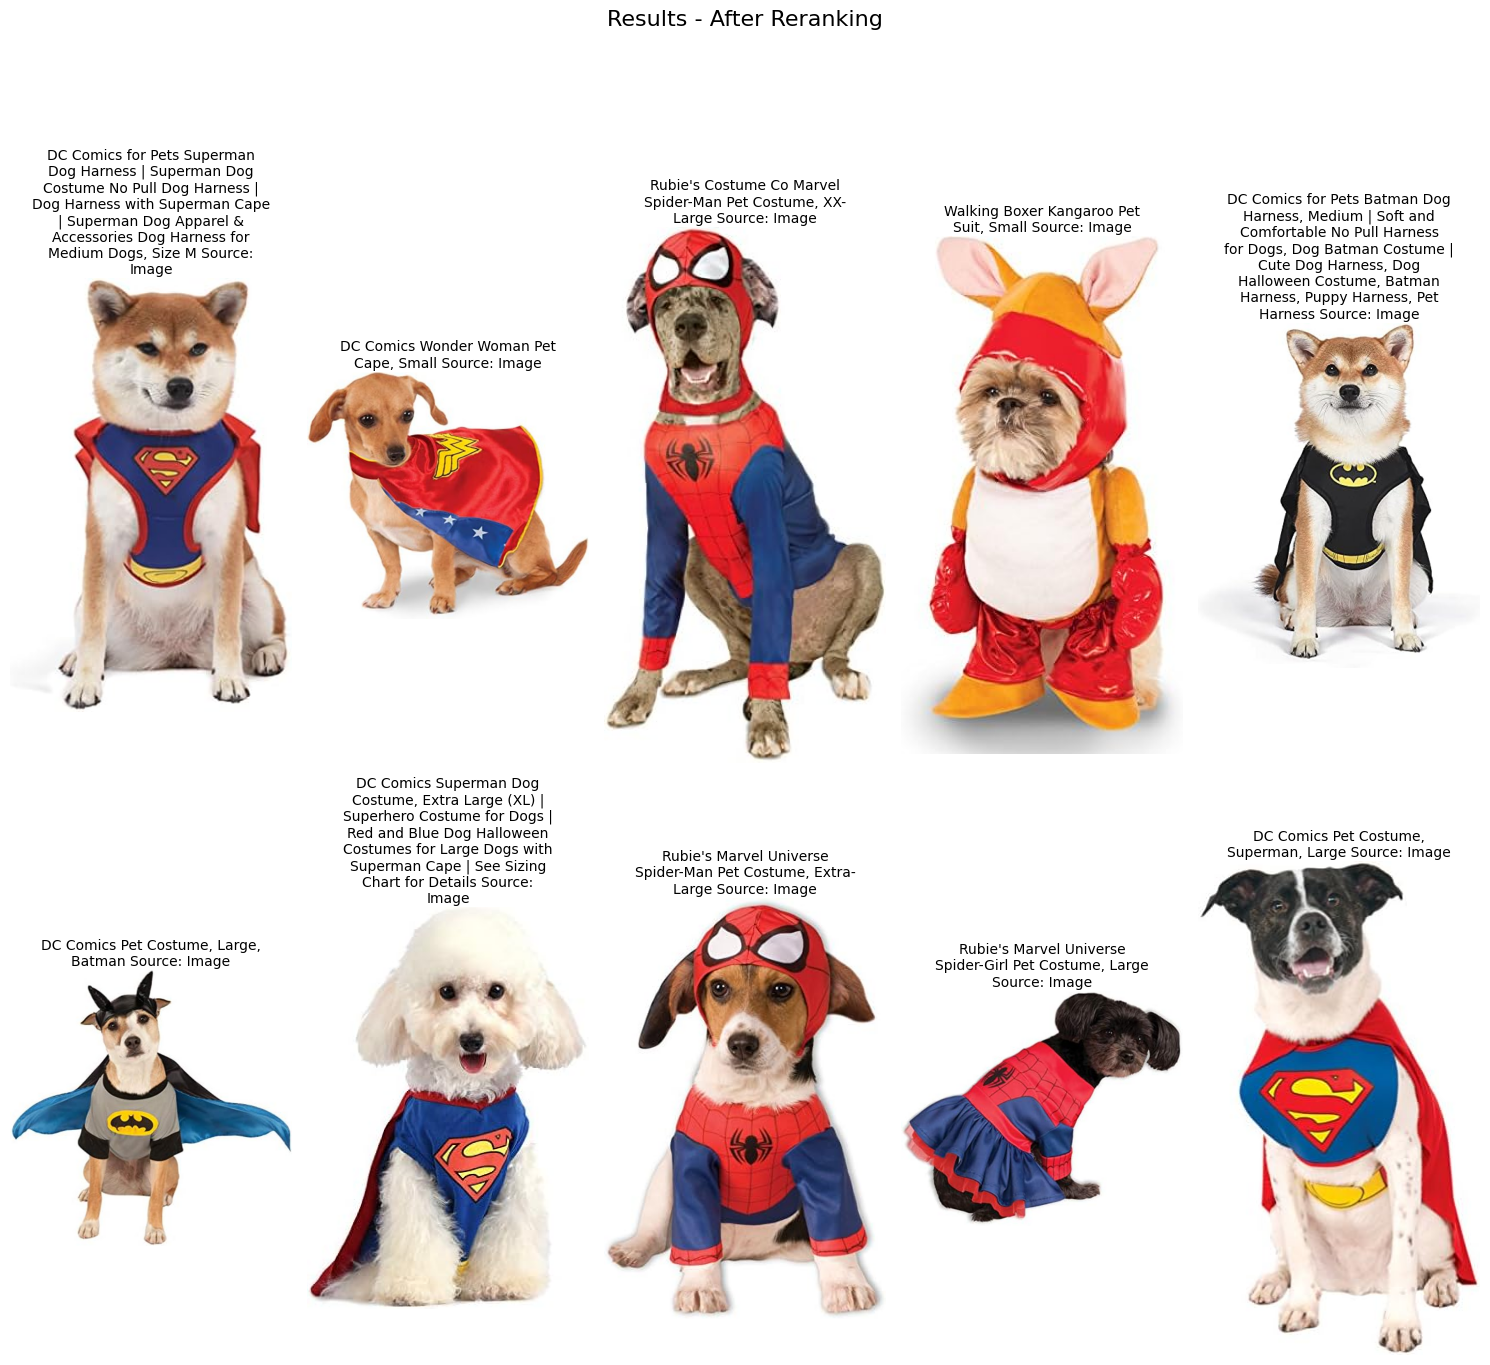

In [ ]:
plot_product_recommendations(result_df, 'Results - After Reranking')


## Image-embeddings clustering

In [ ]:
!pip install kneed --q

In [ ]:
#Clustering Image Only

from sklearn.cluster import KMeans
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
import pandas as pd
from kneed import KneeLocator
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

# Fetch top 50 products from Pinecone based on user query
category = 'Pet Supplies'
user_queries = ["superhero dog costumes"]

q, x = pinecone_retrieve(
    category=category,
    user_query=user_queries[0],
    top_k=50,
    upload_strategy_file_path='/content/Pinecone Upload Strategy - Eval.csv'
)

query_embeddings = np.array([get_embeddings(query) for query in user_queries])
image_only = x[x['source'] == 'Image'][['id', 'title', 'image_url', 'vector']]

product_embeddings = np.stack(image_only['vector'].to_numpy())

# ssd = []
# max_k = 10

# # Calculate SSD for each k
# for k in range(1, max_k + 1):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(product_embeddings)
#     ssd.append(kmeans.inertia_)

# # Find the elbow using KneeLocator
# kneedle = KneeLocator(range(1, max_k + 1), ssd, curve="convex", direction="decreasing")
# optimal_k = kneedle.knee

# Plot the elbow curve with the optimal k highlighted
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, max_k + 1), ssd, marker='o', linestyle='--')
# plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k: {optimal_k}")
# plt.title("Elbow Method for Optimal k")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Distances (SSD)")
# plt.legend()
# plt.grid()
# plt.show()

silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(product_embeddings)
    silhouette_avg = silhouette_score(product_embeddings, cluster_labels)
    silhouette_scores[k] = silhouette_avg

print(f"Silhouette Scores: \n {silhouette_scores}")

# Find the optimal k based on the highest silhouette score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal k: {optimal_k}")

n_clusters = optimal_k  # Adjust based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
product_labels = kmeans.fit_predict(product_embeddings)

query_embeddings = query_embeddings.reshape(-1, query_embeddings.shape[-1])
query_embeddings = query_embeddings.astype(np.float64)

query_cluster = kmeans.predict(query_embeddings)[0]  # Get the cluster for the query
same_cluster_indices = np.where(product_labels == query_cluster)[0]

# Embeddings and metadata for products in the same cluster
cluster_embeddings = product_embeddings[same_cluster_indices]
cluster_metadata = image_only.iloc[same_cluster_indices]

# Compute cosine similarities
similarities = cosine_similarity(query_embeddings.reshape(1, -1), cluster_embeddings).flatten()

# Sort products by similarity
sorted_indices = np.argsort(similarities)[::-1]  # Sort by descending similarity
top_products = cluster_metadata.iloc[sorted_indices[:10]].copy()  # Get top 10 products

# Add similarity scores to the DataFrame
top_products['similarity'] = similarities[sorted_indices[:10]]


# Convert top products to a DataFrame
top_products_df = top_products[['id', 'image_url', 'similarity']]

# Return the DataFrame
top_products_df = pd.merge(top_products_df, image_only, on=['id', 'image_url'], how='inner')
top_products_df1 = top_products_df[['id', 'title', 'image_url', 'similarity']]

if flag_perform_weighted_sum == True:
  top_products_df1['similarity'] = 0.75 * top_products_df1['similarity']

top_products_df1.rename(columns = {'similarity': 'image_only_similarity'}, inplace = True)
top_products_df1


TypeError: can't convert cuda:0 device type tensor to numpy. Use Tensor.cpu() to copy the tensor to host memory first.

In [ ]:
#Clustering Text+Image

non_image_only = x[x['source'] != 'Image'][['id', 'title', 'image_url', 'vector']]

product_embeddings = np.stack(non_image_only['vector'].to_numpy())

# ssd = []
# max_k = 10

# # Calculate SSD for each k
# for k in range(1, max_k + 1):
#     kmeans = KMeans(n_clusters=k, random_state=42)
#     kmeans.fit(product_embeddings)
#     ssd.append(kmeans.inertia_)

# # Find the elbow using KneeLocator
# kneedle = KneeLocator(range(1, max_k + 1), ssd, curve="convex", direction="decreasing")
# optimal_k = kneedle.knee

# Plot the elbow curve with the optimal k highlighted
# plt.figure(figsize=(8, 5))
# plt.plot(range(1, max_k + 1), ssd, marker='o', linestyle='--')
# plt.axvline(x=optimal_k, color='r', linestyle='--', label=f"Optimal k: {optimal_k}")
# plt.title("Elbow Method for Optimal k")
# plt.xlabel("Number of Clusters (k)")
# plt.ylabel("Sum of Squared Distances (SSD)")
# plt.legend()
# plt.grid()
# plt.show()

silhouette_scores = {}
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(product_embeddings)
    silhouette_avg = silhouette_score(product_embeddings, cluster_labels)
    silhouette_scores[k] = silhouette_avg

print(f"Silhouette Scores: \n {silhouette_scores}")

# Find the optimal k based on the highest silhouette score
optimal_k = max(silhouette_scores, key=silhouette_scores.get)
print(f"Optimal k: {optimal_k}")

n_clusters = optimal_k  # Adjust based on your dataset
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
product_labels = kmeans.fit_predict(product_embeddings)

query_embeddings = query_embeddings.reshape(-1, query_embeddings.shape[-1])
query_embeddings = query_embeddings.astype(np.float64)

query_cluster = kmeans.predict(query_embeddings)[0]  # Get the cluster for the query
same_cluster_indices = np.where(product_labels == query_cluster)[0]

# Embeddings and metadata for products in the same cluster
cluster_embeddings = product_embeddings[same_cluster_indices]
cluster_metadata = non_image_only.iloc[same_cluster_indices]

# Compute cosine similarities
similarities = cosine_similarity(query_embeddings.reshape(1, -1), cluster_embeddings).flatten()

# Sort products by similarity
sorted_indices = np.argsort(similarities)[::-1]  # Sort by descending similarity
top_products = cluster_metadata.iloc[sorted_indices[:10]].copy()  # Get top 10 products

# Add similarity scores to the DataFrame
top_products['similarity'] = similarities[sorted_indices[:10]]


# Convert top products to a DataFrame
top_products_df = top_products[['id', 'image_url', 'similarity']]

# Return the DataFrame
top_products_df = pd.merge(top_products_df, non_image_only, on=['id', 'image_url'], how='inner')
top_products_df2 = top_products_df[['id', 'title', 'image_url', 'similarity']]

if flag_perform_weighted_sum == True:
  top_products_df2['similarity'] = 0.25 * top_products_df2['similarity']

top_products_df2.rename(columns = {'similarity': 'text+image_similarity'}, inplace = True)
top_products_df2

In [ ]:
if flag_perform_weighted_sum == True:
  top_products_df = pd.merge(top_products_df1, top_products_df2, on = ['id', 'title', 'image_url'], how = 'outer')
  top_products_df.fillna(0, inplace = True)
  top_products_df['similarity'] = top_products_df['image_only_similarity'] + top_products_df['text+image_similarity']
  top_products_df.sort_values(by = 'similarity', ascending = False, inplace = True)
  top_products_df = top_products_df.reset_index(drop = True)
  top_products_df = top_products_df[['id', 'title', 'image_url', 'similarity']]
  top_products_df = top_products_df.head(10)
  top_products_df
else:
  top_products_df = top_products_df1
  top_products_df.rename(columns = {'image_only_similarity': 'similarity'}, inplace = True)
  top_products_df.sort_values(by = 'similarity', ascending = False, inplace = True)
  top_products_df = top_products_df.reset_index(drop = True)
  top_products_df = top_products_df.head(10)
  top_products_df

In [ ]:
top_products_df

## ROUGE Score Verification using OPEN AI API and GPT-4o

In [ ]:
!pip install openai evaluate rouge_score --q

In [ ]:
#Load Necessary Libraries
import openai
import pandas as pd
from google.colab import userdata
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA, KernelPCA
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from openai import OpenAI
from tqdm import tqdm
import re
import requests
from PIL import Image
from io import BytesIO
import evaluate


openai.api_key = userdata.get('OPENAI_API_KEY')
client = OpenAI(api_key = openai.api_key)
rouge_scorer = evaluate.load('rouge')

In [ ]:
#Function to Create User Queries from Titles and Images of Product Recommendations
#Define Function for Creating User Queries using GPT-4o

def create_user_queries(df, user_query):

  for i in tqdm(range(len(df))):
    # if i not in l: #To handle if 'user_query_vague' or 'user_query_descriptive' have None even after creating the user queries
    #   continue

    response = client.chat.completions.create(
    model="gpt-4o",
    messages=[
      {
        "role": "system",
        "content": [
          {
            "type": "text",
            "text": f"""
            You are a helpful assistant that can read text and images and create user queries that people may use to search on Amazon.
            Create one user query using the Product Image URL that describes the image.
            Make sure that the query you create does not exceed more than 50 characters.
            Do not create queries beginning with 'I want to buy a' or 'I need a'.
            Make sure that the user query has any of has any colors or shapes or objects present in the image.
            Use the Product Title to assist with the creation of the user query but do not rely solely on it.
            """
          }
        ]
      },
      {
      "role": "user",
      "content": [
        {
          "type": "text",
          "text": f"""
                  Product Title: {df.loc[i, 'title']}
                  """
        },
        {
            "type": "image_url",
            "image_url": {
              "url": df.loc[i, 'image_url']
            }
        }
      ]
    }
    ],
    response_format={
      "type": "text"
    },
    temperature=1,
    max_tokens=200,
    frequency_penalty=0,  # Ensure identical scoring
    presence_penalty=0,    # Avoid varying novelty
    top_p=1
  )


    # print(response.choices[0].message.content)
    s = response.choices[0].message.content
    print(f"Title: {df.loc[i, 'title']}")
    print(f"Image URL: {df.loc[i, 'image_url']}")
    print(f"User Query: {s}")

    df.loc[i, 'gpt_user_query'] = s

    rouge_score = rouge_scorer.compute(predictions = [s], references = [user_query])

    df.loc[i, 'ROUGE-1'] = rouge_score['rouge1']
    df.loc[i, 'ROUGE-2'] = rouge_score['rouge2']
    df.loc[i, 'ROUGE-L'] = rouge_score['rougeL']
    df.loc[i, 'ROUGE-LSum'] = rouge_score['rougeLsum']

  return df

In [ ]:
result_df = result_df.reset_index(drop = True)
result_df = create_user_queries(result_df, "superhero dog costumes")
result_df

In [ ]:
top_products_df = top_products_df.reset_index(drop = True)
top_products_df = create_user_queries(top_products_df, "superhero dog costumes")
top_products_df

In [ ]:
import numpy as np


print(f"SemantiScout - Average ROUGE-1 Score: {np.mean(result_df['ROUGE-1'])}")
print(f"SemantiScout - Average ROUGE-2 Score: {result_df['ROUGE-2'].mean()}")
print(f"SemantiScout - Average ROUGE-L Score: {np.mean(result_df['ROUGE-L'])}")

print(f"Clustering - Average ROUGE-1 Score: {np.mean(top_products_df['ROUGE-1'])}")
print(f"Clustering - Average ROUGE-2 Score: {top_products_df['ROUGE-2'].mean()}")
print(f"Clustering - Average ROUGE-L Score: {np.mean(top_products_df['ROUGE-L'])}")

In [ ]:
from sentence_transformers import SentenceTransformer, util
import torch
import torch.nn.functional as F
from transformers import AutoModel, AutoTokenizer


# model = SentenceTransformer('all-MiniLM-L6-v2')  # A lightweight zero-shot similarity model
# model = SentenceTransformer('llmrails/ember-v1')
# model = SentenceTransformer('BAAI/bge-base-en-v1.5')
# model = SentenceTransformer('WhereIsAI/UAE-Large-V1')
model = SentenceTransformer('mixedbread-ai/mxbai-embed-2d-large-v1')

# tokenizer = AutoTokenizer.from_pretrained("hyp1231/blair-roberta-base")
# model = AutoModel.from_pretrained("hyp1231/blair-roberta-base")

def cosine_similarity(sentence1, sentence2):
    return util.cos_sim(model.encode(sentence1), model.encode(sentence2))

# def cosine_similarity(sentence1, sentence2): #Uncomment this function if using BLAIR Model
#   texts = [sentence1, sentence2]
#   inputs = tokenizer(texts, padding=True, truncation=True, return_tensors='pt')
#   with torch.no_grad():
#     embeddings = model(**inputs, return_dict=True).last_hidden_state[:, 0]
#     embeddings = embeddings / embeddings.norm(dim=1, keepdim=True)

#   return embeddings[0] @ embeddings[1]


result_df_similarities = []

for i in range(len(result_df)):
  result_df_similarities.append(cosine_similarity("superhero dog costumes", result_df.loc[i, 'gpt_user_query']))

print(f"SemantiScout Results - Average Cosine Similarity: {np.mean(result_df_similarities)}")


In [ ]:
result_df_similarities

In [ ]:
top_products_df_similarities = []

for i in range(len(top_products_df)):
  top_products_df_similarities.append(cosine_similarity("superhero dog costumes", top_products_df.loc[i, 'gpt_user_query']))

print(f"Clustering Results - Average Cosine Similarity: {np.mean(top_products_df_similarities)}")

In [ ]:
top_products_df_similarities